In [2]:
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import matplotlib.pyplot as plt
import pandas as pd
import json
from IPython.display import HTML, Image, Latex, Math, Markdown, SVG, JSON

%matplotlib inline

In [2]:
G = nx.read_gpickle("/Users/martin/Dropbox/Development/keboola_dbt_beer_demo_datafold/target/graph.gpickle")
G

In [3]:
print(G.nodes)
print("\n")
print(G.out_edges)
print("\n")
print(G.in_edges)
#print(dict(G.nodes))
print("\n")
print(G.nodes['source.beer_analytics.WORKSPACE_863912091.beers'])
print("\n")
print(G.edges)

['source.beer_analytics.WORKSPACE_863912091.beers', 'source.beer_analytics.WORKSPACE_863912091.breweries', 'model.beer_analytics.beers_with_breweries', 'model.beer_analytics.beers', 'model.beer_analytics.breweries', 'model.beer_analytics.orders', 'model.beer_analytics.order_lines', 'model.beer_analytics.sales', 'model.beer_analytics.promo_deliveries', 'test.beer_analytics.assert_ibu_0_100_range', 'seed.beer_analytics.seed_breweries', 'seed.beer_analytics.seed_beers', 'test.beer_analytics.not_null_beers_with_breweries_brewery_id.1725a2e6dc', 'test.beer_analytics.unique_beers_with_breweries_beer_id.aeaa7c6743', 'test.beer_analytics.not_null_beers_with_breweries_beer_id.06c4b94123', 'test.beer_analytics.unique_beers_beer_id.594ed33081', 'test.beer_analytics.not_null_beers_beer_id.efaf5f5466', 'test.beer_analytics.relationships_order_lines_order_no__order_no__ref_orders_.35667b5672', 'test.beer_analytics.unique_order_lines_order_line.0b400fba5e', 'test.beer_analytics.not_null_sales_order_n

In [4]:
edge_values = nx.get_edge_attributes(G, ('source.beer_analytics.WORKSPACE_863912091.breweries', 'model.beer_analytics.breweries'))
edge_values

{}

In [5]:
## Custom Colours
#https://www.python-graph-gallery.com/324-map-a-color-to-network-nodes
carac = pd.DataFrame()
colour = pd.Categorical(list(nx.get_node_attributes(G, "resource_type").values()))
carac['myvalue']=pd.Categorical(list(nx.get_node_attributes(G, "resource_type").values()))

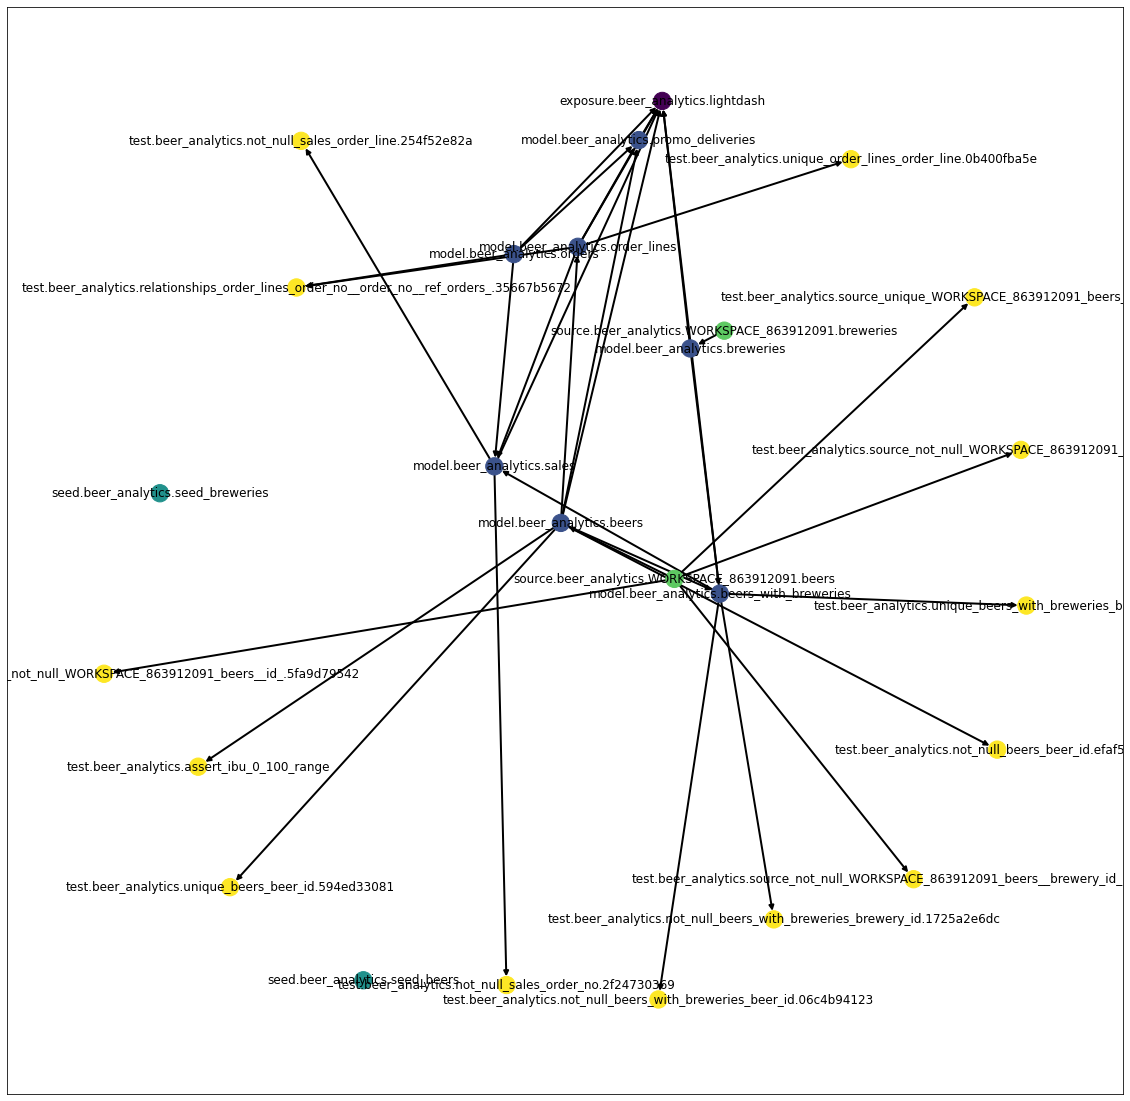

In [6]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(
    G,
    cmap=plt.get_cmap('viridis'),
    node_color=carac['myvalue'].cat.codes,
    with_labels=True,
    font_color='black',
    alpha=1,
    width=2, 
#    linewidths=10,
#    arrowstyle='-|>',
#    node_shape='s'
    )
#plt.savefig(“Output/plain organogram using networkx.jpeg”, dpi = 300)

plt.show()

In [27]:
G1 = nx.DiGraph(G)
values = nx.get_node_attributes(G1, "resource_type")


In [28]:
del_resources = ["test", "seed"]

for a in del_resources:
    to_be_removed = [x for x in values if values[x] == a]

    for x in to_be_removed:
        G1.remove_node(x)

print(G1.nodes())

['source.beer_analytics.WORKSPACE_863912091.beers', 'source.beer_analytics.WORKSPACE_863912091.breweries', 'model.beer_analytics.beers_with_breweries', 'model.beer_analytics.beers', 'model.beer_analytics.breweries', 'model.beer_analytics.orders', 'model.beer_analytics.order_lines', 'model.beer_analytics.sales', 'model.beer_analytics.promo_deliveries', 'exposure.beer_analytics.lightdash']


In [29]:
print(list(nx.topological_sort(G1)))
print(nx.is_directed(G1))
print(nx.is_directed_acyclic_graph(G1))

['source.beer_analytics.WORKSPACE_863912091.beers', 'source.beer_analytics.WORKSPACE_863912091.breweries', 'model.beer_analytics.orders', 'model.beer_analytics.beers', 'model.beer_analytics.breweries', 'model.beer_analytics.order_lines', 'model.beer_analytics.beers_with_breweries', 'model.beer_analytics.promo_deliveries', 'model.beer_analytics.sales', 'exposure.beer_analytics.lightdash']
True
True


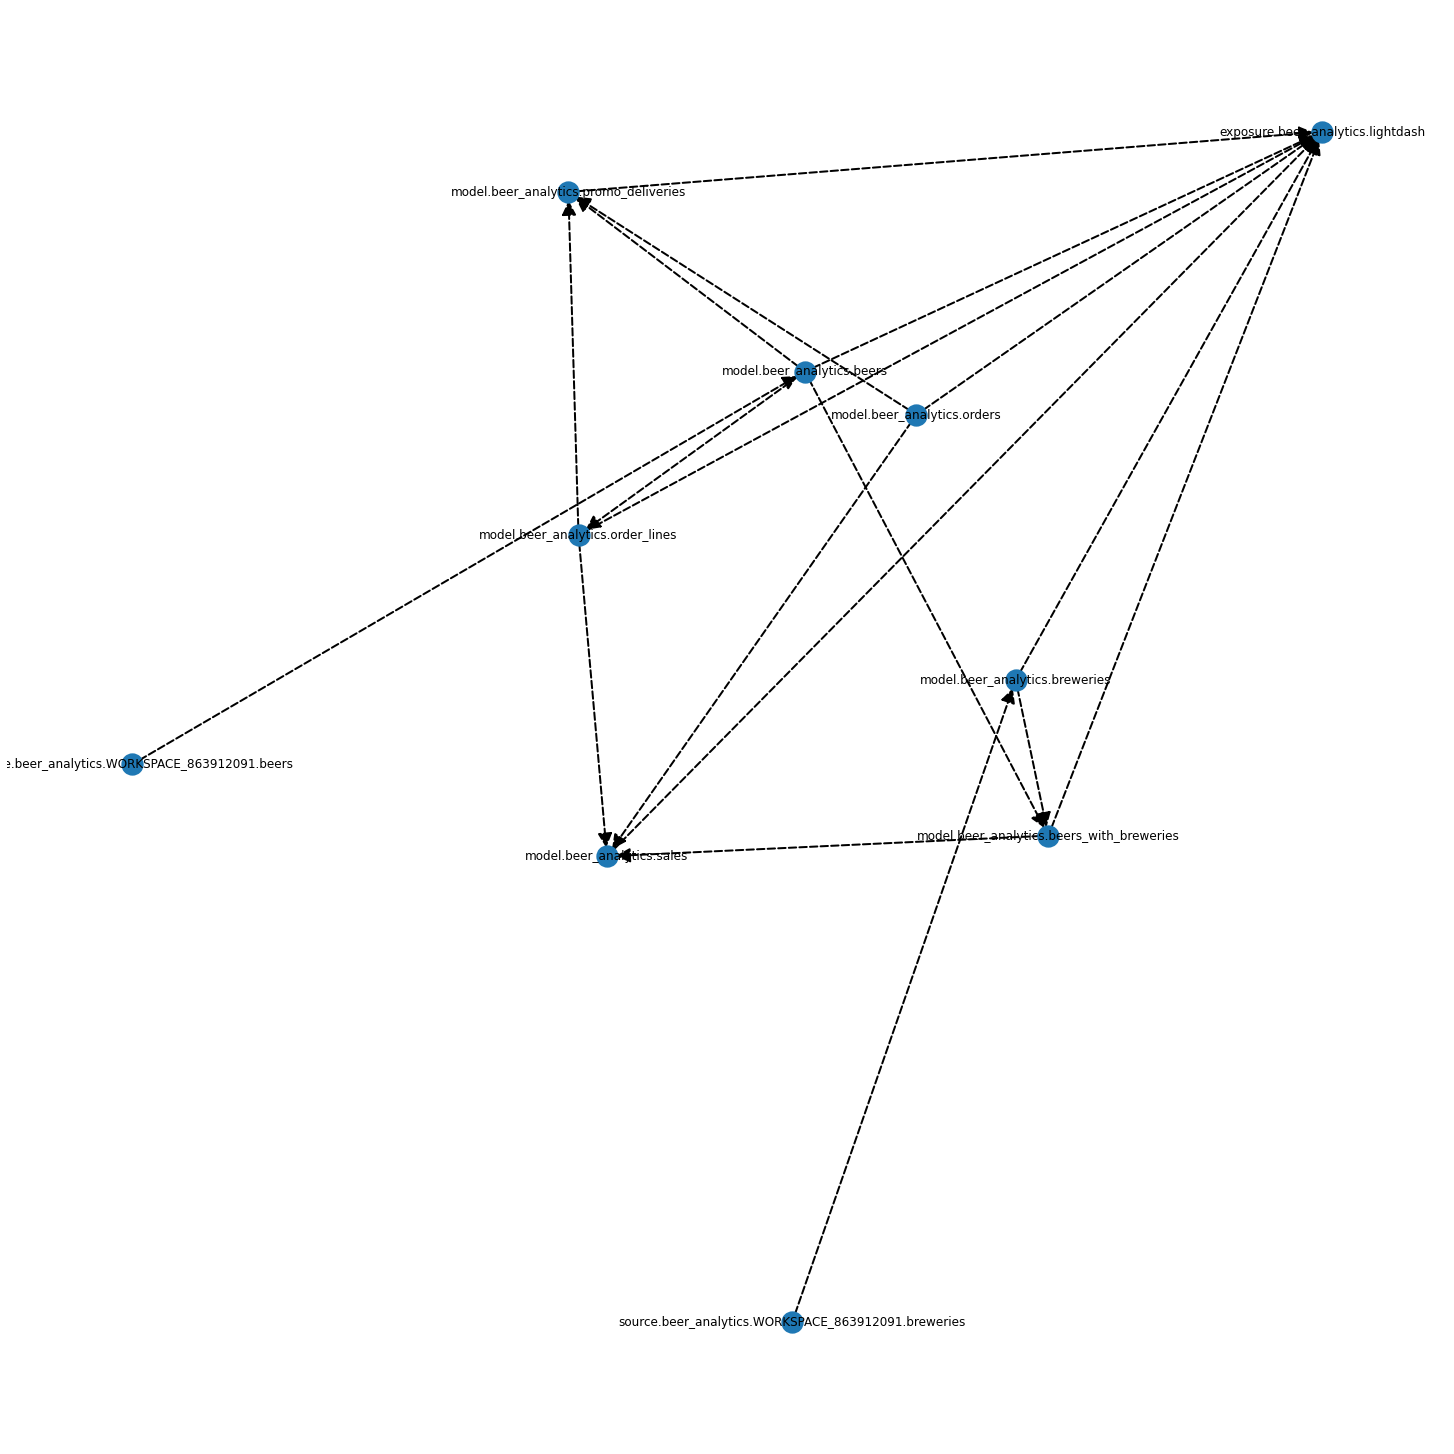

In [30]:
plt.figure(figsize=(20, 20))
nx.draw_spring(
    G1,
#    cmap=plt.get_cmap('viridis'),
#    node_color=carac['myvalue'].cat.codes,
    with_labels=True,
    font_color='black',
    alpha=1,
    width=2, 
    linewidths=5,
    arrowsize=30,
    style="dashed"
#    arrowstyle='-|>',
#    node_shape='s'
    )
#plt.savefig(“Output/plain organogram using networkx.jpeg”, dpi = 300)
plt.tight_layout()

plt.show()

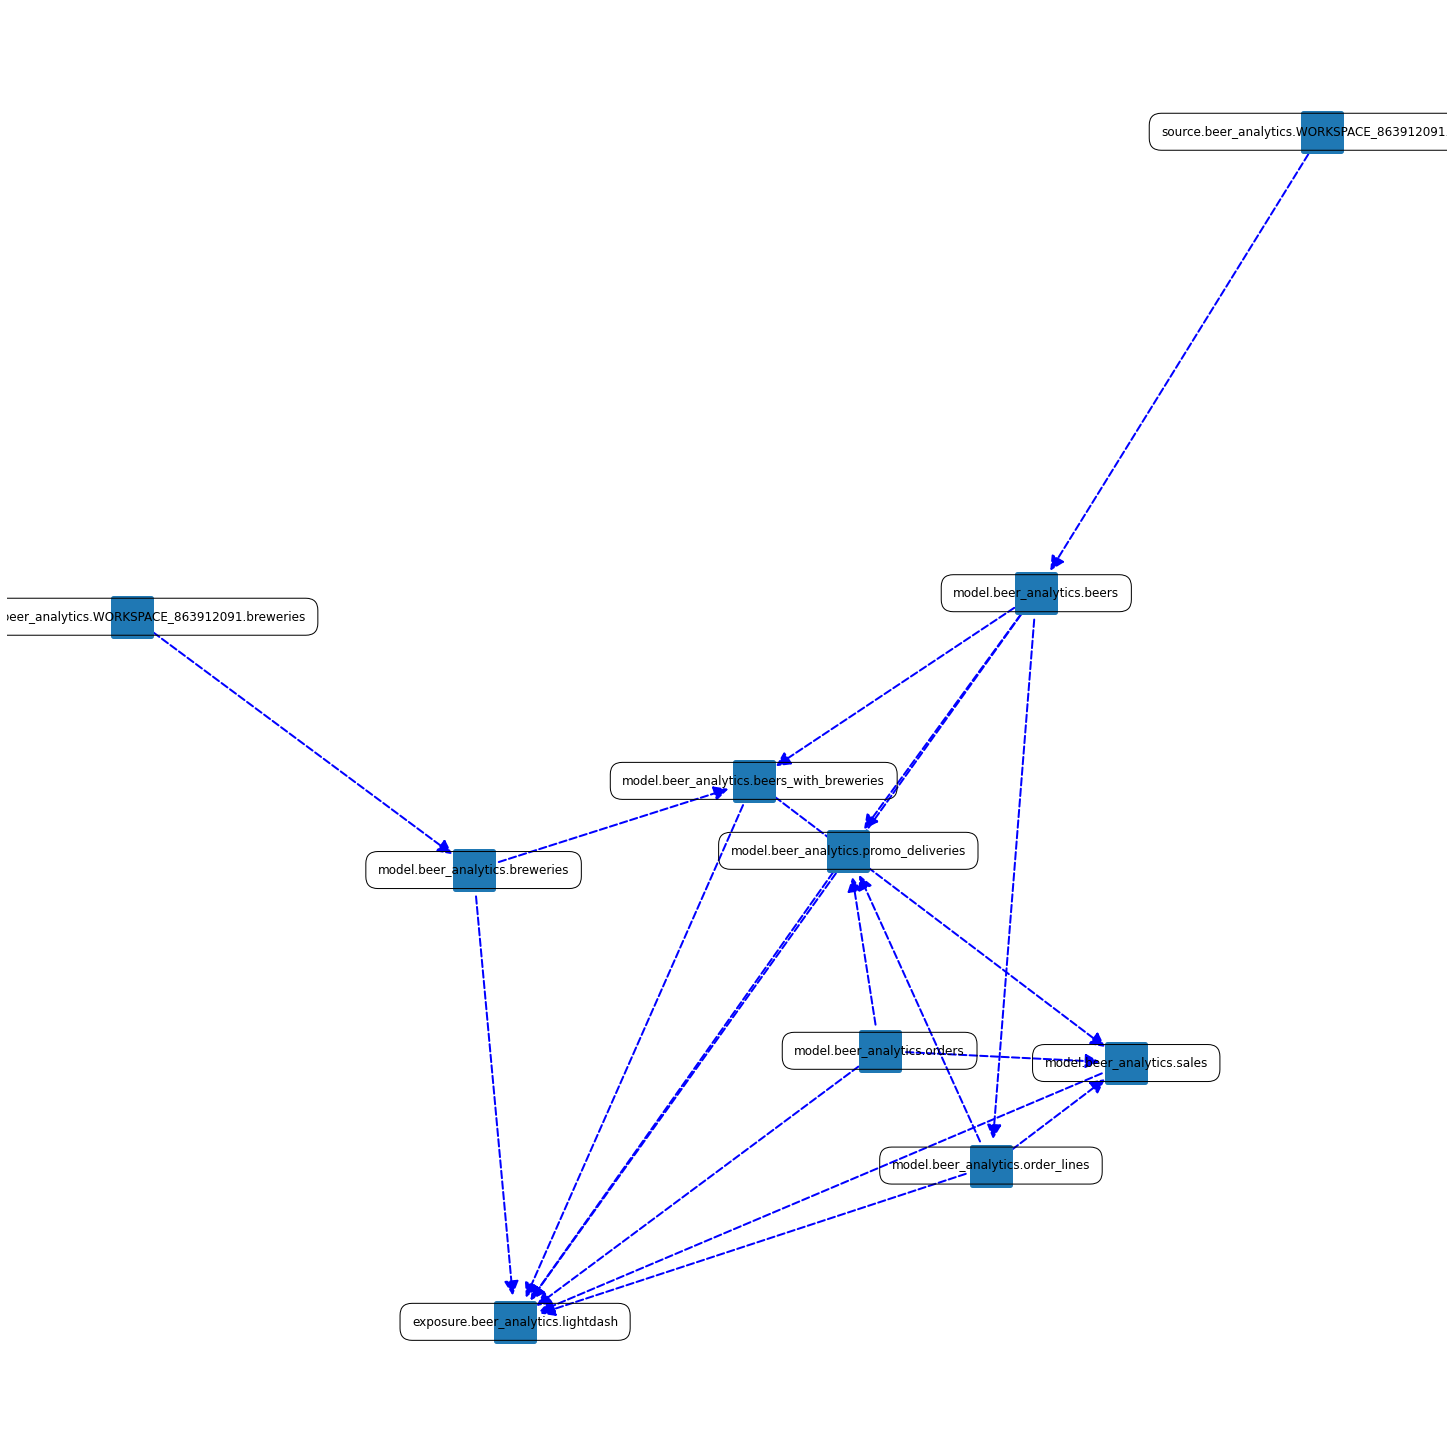

In [35]:

plt.figure(figsize=(20, 20))

nx.draw(
    G1,
#    pos=nx.kamada_kawai_layout(G1),
#    pos=nx.fruchterman_reingold_layout(G1),
#    pos=nx.shell_layout(G1),
    pos=nx.spring_layout(G1),
#    pos=nx.spectral_layout(G1),
    with_labels=True,
    font_color='black',
    alpha=1,
    width=2, 
    linewidths=5,
    arrowsize=30,
    style="dashed",
    edge_color="b",
    node_shape="s",
    node_size=1400,
    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'),
    )

plt.tight_layout()
plt.show()

In [12]:
nx.edges(G1, ['model.beer_analytics.sales'], )

OutEdgeDataView([('model.beer_analytics.sales', 'exposure.beer_analytics.lightdash')])

*Degree centrality* of a node is the fraction of the total nodes it is connected to. A node with a high degree centrality is generally considered highly active. In G, node 3 i.e. Team B Lead has the highest degree centrality since it is connected to four other nodes.

*Betweenness centrality* is a measure of how many times a particular node lies on the shortest path between all pairs of nodes in a graph. In G, team B lead has the highest betweenness centrality followed by team A lead. This implies that the team leads act as bridges between the CEO and the staff. The CEO and the staff have zero betweenness centrality because they don’t lie between any two nodes.

*Closeness centrality* is a measure of the proximity of a node to other nodes. It is calculated as the average of the shortest path length from the node to every other node in the network (Golbeck, 2013). In the case of closeness centrality, the nodes with lower values have higher centrality. This implies that the CEO and team leads have more centrality as compared to the staff (Golbeck, 2013).

In [13]:
nx.degree_centrality(G1)

{'source.beer_analytics.WORKSPACE_863912091.beers': 0.1111111111111111,
 'source.beer_analytics.WORKSPACE_863912091.breweries': 0.1111111111111111,
 'model.beer_analytics.beers_with_breweries': 0.4444444444444444,
 'model.beer_analytics.beers': 0.5555555555555556,
 'model.beer_analytics.breweries': 0.3333333333333333,
 'model.beer_analytics.orders': 0.3333333333333333,
 'model.beer_analytics.order_lines': 0.4444444444444444,
 'model.beer_analytics.sales': 0.4444444444444444,
 'model.beer_analytics.promo_deliveries': 0.4444444444444444,
 'exposure.beer_analytics.lightdash': 0.7777777777777777}

In [14]:
nx.betweenness_centrality(G1)

{'source.beer_analytics.WORKSPACE_863912091.beers': 0.0,
 'source.beer_analytics.WORKSPACE_863912091.breweries': 0.0,
 'model.beer_analytics.beers_with_breweries': 0.041666666666666664,
 'model.beer_analytics.beers': 0.06944444444444445,
 'model.beer_analytics.breweries': 0.041666666666666664,
 'model.beer_analytics.orders': 0.0,
 'model.beer_analytics.order_lines': 0.013888888888888888,
 'model.beer_analytics.sales': 0.0,
 'model.beer_analytics.promo_deliveries': 0.0,
 'exposure.beer_analytics.lightdash': 0.0}

In [15]:
nx.closeness_centrality(G1)

{'source.beer_analytics.WORKSPACE_863912091.beers': 0.0,
 'source.beer_analytics.WORKSPACE_863912091.breweries': 0.0,
 'model.beer_analytics.beers_with_breweries': 0.2962962962962963,
 'model.beer_analytics.beers': 0.1111111111111111,
 'model.beer_analytics.breweries': 0.1111111111111111,
 'model.beer_analytics.orders': 0.0,
 'model.beer_analytics.order_lines': 0.14814814814814814,
 'model.beer_analytics.sales': 0.4188034188034188,
 'model.beer_analytics.promo_deliveries': 0.35555555555555557,
 'exposure.beer_analytics.lightdash': 0.8181818181818182}

## Pyvis

In [16]:
from pyvis.network import Network

const_options = {
  "nodes": {
    "borderWidth": "null",
    "borderWidthSelected": "null",
    "opacity": "null",
    "shape": "dot",
    "size": "null"
  },
  "edges": {
    "arrows": {
      "to": {
        "enabled": "true"
      }
    },
    "color": {
      "inherit": "true"
    },
    "physics": "false",
    "selfReferenceSize": "null",
    "selfReference": {
      "angle": 0.7853981633974483
    },
    "smooth": "false"
  },
  "layout": {
    "hierarchical": {
      "enabled": "true",
      "levelSeparation": 200,
      "direction": "LR",
      "sortMethod": "directed"
    }
  },
  "physics": {
    "enabled": "false",
    "hierarchicalRepulsion": {
      "centralGravity": 0,
      "avoidOverlap": "null"
    },
    "minVelocity": 0.75,
    "solver": "hierarchicalRepulsion"
  }
}



nt = Network('1200px', '800px', notebook=False)
nt.from_nx(G1)

#nt.set_options(const_options)
#nt.show_buttons()
nt.show("dag.html")

## dbt code

In [17]:
from typing import Set, Iterable, Iterator, Optional, NewType
from itertools import product
import networkx as nx  # type: ignore

from dbt.exceptions import InternalException

UniqueId = NewType("UniqueId", str)


class Graph:
    """A wrapper around the networkx graph that understands SelectionCriteria
    and how they interact with the graph.
    """

    def __init__(self, graph):
        self.graph = graph

    def nodes(self) -> Set[UniqueId]:
        return set(self.graph.nodes())

    def edges(self):
        return self.graph.edges()

    def __iter__(self) -> Iterator[UniqueId]:
        return iter(self.graph.nodes())

    def ancestors(self, node: UniqueId, max_depth: Optional[int] = None) -> Set[UniqueId]:
        """Returns all nodes having a path to `node` in `graph`"""
        if not self.graph.has_node(node):
            raise InternalException(f"Node {node} not found in the graph!")
        return {
            child
            for _, child in nx.bfs_edges(self.graph, node, reverse=True, depth_limit=max_depth)
        }

    def descendants(self, node: UniqueId, max_depth: Optional[int] = None) -> Set[UniqueId]:
        """Returns all nodes reachable from `node` in `graph`"""
        if not self.graph.has_node(node):
            raise InternalException(f"Node {node} not found in the graph!")
        return {child for _, child in nx.bfs_edges(self.graph, node, depth_limit=max_depth)}

    def select_childrens_parents(self, selected: Set[UniqueId]) -> Set[UniqueId]:
        ancestors_for = self.select_children(selected) | selected
        return self.select_parents(ancestors_for) | ancestors_for

    def select_children(
        self, selected: Set[UniqueId], max_depth: Optional[int] = None
    ) -> Set[UniqueId]:
        descendants: Set[UniqueId] = set()
        for node in selected:
            descendants.update(self.descendants(node, max_depth))
        return descendants

    def select_parents(
        self, selected: Set[UniqueId], max_depth: Optional[int] = None
    ) -> Set[UniqueId]:
        ancestors: Set[UniqueId] = set()
        for node in selected:
            ancestors.update(self.ancestors(node, max_depth))
        return ancestors

    def select_successors(self, selected: Set[UniqueId]) -> Set[UniqueId]:
        successors: Set[UniqueId] = set()
        for node in selected:
            successors.update(self.graph.successors(node))
        return successors

    def get_subset_graph(self, selected: Iterable[UniqueId]) -> "Graph":
        """Create and return a new graph that is a shallow copy of the graph,
        but with only the nodes in include_nodes. Transitive edges across
        removed nodes are preserved as explicit new edges.
        """

        new_graph = self.graph.copy()
        include_nodes = set(selected)

        for node in self:
            if node not in include_nodes:
                source_nodes = [x for x, _ in new_graph.in_edges(node)]
                target_nodes = [x for _, x in new_graph.out_edges(node)]

                new_edges = product(source_nodes, target_nodes)
                non_cyclic_new_edges = [
                    (source, target) for source, target in new_edges if source != target
                ]  # removes cyclic refs

                new_graph.add_edges_from(non_cyclic_new_edges)
                new_graph.remove_node(node)

        for node in include_nodes:
            if node not in new_graph:
                raise ValueError(
                    "Couldn't find model '{}' -- does it exist or is " "it disabled?".format(node)
                )

        return Graph(new_graph)

    def subgraph(self, nodes: Iterable[UniqueId]) -> "Graph":
        return Graph(self.graph.subgraph(nodes))

    def get_dependent_nodes(self, node: UniqueId):
        return nx.descendants(self.graph, node)